# DESAFÍO: ANÁLISIS EXPLORATORIO DE DATOS DE LOS USUARIOS LOGUEADOS

En este cuaderno, realizaremos un análisis exploratorio de los datos relacionados con los usuarios logueados en nuestra aplicación. Nuestra principal meta es extraer información relevante para abordar aspectos cruciales con el equipo de negocios. A través de las conclusiones obtenidas, podremos profundizar en el perfil de nuestro público objetivo y evaluar la recepción que está teniendo nuestra aplicación entre el público.

#### Los datos en el DataFrame muestran información detallada sobre los usuarios logueados:

-La columna "fecha" contiene la fecha de logueo de cada usuario.
-La columna "nombre" muestra el nombre de cada usuario.
-"cp" representa el código postal del lugar de residencia del usuario.
-"edad" indica la fecha de nacimiento de cada usuario.
-"n_hijos_menores" muestra el número de hijos menores de cada usuario.
-"sexo" indica el género de cada usuario.
-"email" es la dirección de correo electrónico de cada usuario.

#### Antes de realizar el análisis, es importante abordar ciertas cuestiones de limpieza y consistencia en los datos:

    Asegurarnos de que todas las fechas en la columna "fecha" estén en un formato consistente.

    Calcular la edad real de los usuarios a partir de la fecha de nacimiento y registrarla en la columna "edad".

    Revisar y normalizar los valores en la columna "sexo" para que sean consistentes en mayúsculas o minúsculas.

    Eliminar o tratar duplicados en los nombres de usuarios para garantizar la unicidad.

    Verificar que todas las direcciones de correo electrónico sean válidas y no haya duplicados.

#### Con los datos limpios y listos para el análisis, exploraremos diversas métricas y patrones para obtener insights valiosos:

    Comportamiento de inicio de sesión: Analizaremos la frecuencia y el horario de inicio de sesión para identificar momentos de mayor actividad.

    Distribución geográfica: Investigaremos la ubicación de nuestros usuarios para conocer las regiones con mayor participación y explorar oportunidades de expansión.

    Características demográficas: Examinaremos datos como la edad, el género y la cantidad de hijos menores para entender mejor el perfil de nuestros usuarios.

    Retención y abandono: Estudiaremos la frecuencia de inicio de sesión de los usuarios y las tasas de abandono para detectar posibles áreas de mejora.

    Interacciones y preferencias: Analizaremos las acciones más comunes de los usuarios dentro de la aplicación y sus preferencias de contenido para mejorar la experiencia del usuario.

Con el análisis completo, presentaremos un informe detallado que destacará los hallazgos más relevantes y ofrecerá recomendaciones clave para enriquecer nuestra estrategia comercial. 

In [57]:
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta

# Rutas
import os

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de las variables categóricas que se pueden ordenar
from sklearn.preprocessing import LabelEncoder

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Leemos el DataFrame
df = pd.read_csv("csv/usuarios_logueados.csv")
df

,fecha_registro,nombre,user_id,sexo,fecha_nacimiento,cp,n_hijos_menores,email
0,24-04-2023,Lynn Moore,655346,M,27-09-1954,28023,5,thomasgeorge@example.com
1,02-06-2023,Lisa Valenzuela,279526,H,28-10-1934,28037,2,kbarrera@example.net
2,20-03-2023,Matthew Marshall,797457,H,17-09-1946,28035,2,joshuawagner@example.com
3,03-02-2023,Ryan Rogers,803906,H,13-06-1936,28026,2,wweber@example.net
4,25-01-2023,Destiny Shaffer,314182,H,27-12-1961,28024,0,ericksonsandra@example.com
...,...,...,...,...,...,...,...,...
495,01-03-2023,Hannah Luna,204336,H,14-08-2002,28083,4,romanmargaret@example.com
496,26-02-2023,Christopher Powell,802317,M,12-08-1930,28054,1,veronicajohnson@example.com
497,02-02-2023,Sara Morse,549513,M,22-07-1924,28053,2,liubrenda@example.net
498,04-02-2023,Dr. Peter Curry,292753,M,16-05-1942,28026,4,orivera@example.net


In [59]:
df.dtypes

fecha_registro      object
nombre              object
user_id              int64
sexo                object
fecha_nacimiento    object
cp                   int64
n_hijos_menores      int64
email               object
dtype: object

In [60]:
# Observamos que la cantidad de datos es bastante grande con 319755 filas y 18 columnas
# No nos encontramos con valores nulos
# Tenemos valores de tipo objeto y float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_registro    500 non-null    object
 1   nombre            500 non-null    object
 2   user_id           500 non-null    int64 
 3   sexo              500 non-null    object
 4   fecha_nacimiento  500 non-null    object
 5   cp                500 non-null    int64 
 6   n_hijos_menores   500 non-null    int64 
 7   email             500 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


In [61]:
# Nos asecuramos de que no hay valores nulos en ninguna columna
df.isnull().sum()

fecha_registro      0
nombre              0
user_id             0
sexo                0
fecha_nacimiento    0
cp                  0
n_hijos_menores     0
email               0
dtype: int64

### 1. Fecha_registro

In [62]:
# Convertimos la columna 'fecha_registro' a tipo datetime
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'], format='%d-%m-%Y')

### 2. Sexo

In [63]:
# De la columna de "Sexo"
df["sexo"][df["sexo"] == "M"] = 0 # mujer
df["sexo"][df["sexo"] == "H"] = 1 # hombre

# Cambio de tipo objet a tipo int
df["sexo"] = df["sexo"].astype(int)

### 3. Fecha_nacimiento

In [64]:
# Convertimos la columna 'fecha_nacimiento' a tipo datetime
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'], format='%d-%m-%Y')

In [65]:
# Calculamos la edad que tendrán hoy los usuarios
hoy = pd.to_datetime('today')
hoy

Timestamp('2023-07-27 15:55:50.004702')

In [66]:
df['edad'] = hoy.year - df['fecha_nacimiento'].dt.year
df["edad"]

0      69
1      89
2      77
3      87
4      62
       ..
495    21
496    93
497    99
498    81
499    28
Name: edad, Length: 500, dtype: int32

In [67]:
# Eliminación de la columna 'fecha_nacimiento', ya que ahora tenemos la edad en su lugar
df.drop(["fecha_nacimiento", "nombre", "email"], axis=1, inplace=True)

In [68]:
df

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad
0,2023-04-24,655346,0,28023,5,69
1,2023-06-02,279526,1,28037,2,89
2,2023-03-20,797457,1,28035,2,77
3,2023-02-03,803906,1,28026,2,87
4,2023-01-25,314182,1,28024,0,62
...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21
496,2023-02-26,802317,0,28054,1,93
497,2023-02-02,549513,0,28053,2,99
498,2023-02-04,292753,0,28026,4,81


In [69]:
df.dtypes

fecha_registro     datetime64[ns]
user_id                     int64
sexo                        int32
cp                          int64
n_hijos_menores             int64
edad                        int32
dtype: object

In [70]:
df.describe()

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad
count,500,500.00000,500.000000,500.000000,500.000000,500.000000
mean,2023-04-18 12:11:31.200000,551912.60800,0.474000,28034.784000,2.396000,58.988000
min,2023-01-01 00:00:00,103476.00000,0.000000,28001.000000,0.000000,18.000000
25%,2023-02-26 18:00:00,305890.75000,0.000000,28018.000000,1.000000,37.750000
50%,2023-04-17 12:00:00,554004.50000,0.000000,28031.000000,2.000000,57.000000
75%,2023-06-14 06:00:00,778429.25000,1.000000,28047.250000,4.000000,81.000000
max,2023-07-26 00:00:00,997308.00000,1.000000,28087.000000,5.000000,101.000000
std,NaN,260494.89536,0.499824,22.850594,1.721951,24.407361


In [71]:
# Para saber como de balanceados están los datos
columns_to_count =["sexo", "cp", "n_hijos_menores", "edad"]
for column in columns_to_count:
    value_counts = df[column].value_counts()
    print(column, value_counts)

sexo sexo
0    263
1    237
Name: count, dtype: int64
cp cp
28030    15
28025    14
28040    13
28020    13
28071    13
         ..
28013     4
28051     4
28044     4
28012     3
28018     3
Name: count, Length: 63, dtype: int64
n_hijos_menores n_hijos_menores
0    95
2    89
4    82
1    82
5    77
3    75
Name: count, dtype: int64
edad edad
84     13
33     12
45     12
35     11
21     11
       ..
27      2
73      2
88      2
101     1
68      1
Name: count, Length: 84, dtype: int64


#### VISUALIZACIONES POR "FECHA_REGISTRO"

In [72]:
df

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad
0,2023-04-24,655346,0,28023,5,69
1,2023-06-02,279526,1,28037,2,89
2,2023-03-20,797457,1,28035,2,77
3,2023-02-03,803906,1,28026,2,87
4,2023-01-25,314182,1,28024,0,62
...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21
496,2023-02-26,802317,0,28054,1,93
497,2023-02-02,549513,0,28053,2,99
498,2023-02-04,292753,0,28026,4,81


In [73]:
df.dtypes

fecha_registro     datetime64[ns]
user_id                     int64
sexo                        int32
cp                          int64
n_hijos_menores             int64
edad                        int32
dtype: object

In [74]:
# Extraemos el mes de la columna 'fecha_registro'
df['mes_registro'] = df['fecha_registro'].dt.month
df['mes_registro']

0      4
1      6
2      3
3      2
4      1
      ..
495    3
496    2
497    2
498    2
499    3
Name: mes_registro, Length: 500, dtype: int32

In [75]:
# Contamos el número de usuarios en cada mes
users_por_mes = df['mes_registro'].value_counts().sort_index()
users_por_mes

mes_registro
1    64
2    65
3    77
4    73
5    67
6    85
7    69
Name: count, dtype: int64

In [ ]:
plt.hist(df['n_hijos_menores'], bins=range(min(df['n_hijos_menores']), max(df['n_hijos_menores']) + 2), 
         edgecolor='black', align='left', width=0.8)

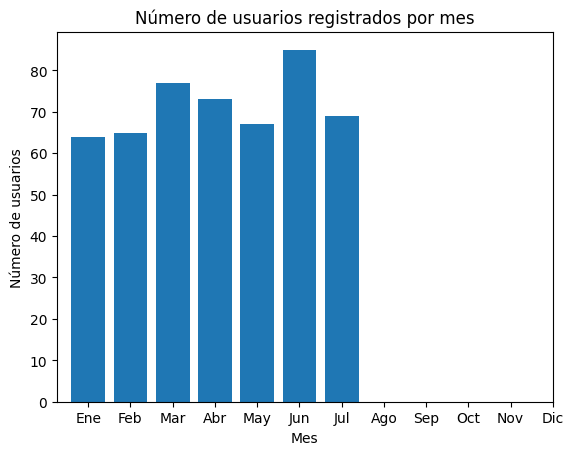

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\usuarios_por_mes_barras.png


In [157]:

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'usuarios_por_mes_barras.png')

# Gráfico de barras para mostrar el número de usuarios por mes
plt.bar(users_por_mes.index, users_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.title('Número de usuarios registrados por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.savefig(output_file)
plt.show()

print(f"Gráfico guardado en: {output_file}")


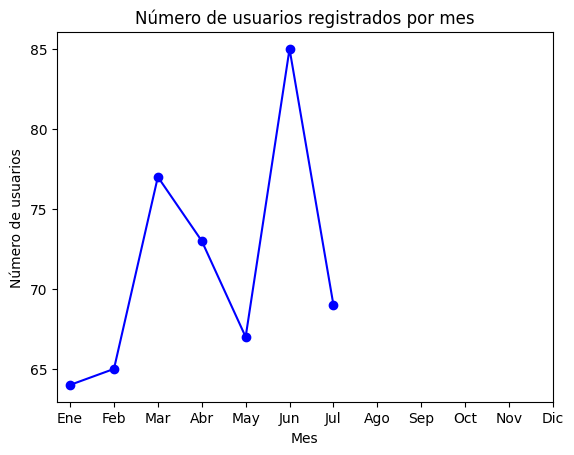

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\usuarios_por_mes_lineas.png


In [158]:

df['mes_registro'] = df['fecha_registro'].dt.month

# Contamos el número de usuarios por mes
users_por_mes = df['mes_registro'].value_counts().sort_index()

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'usuarios_por_mes_lineas.png')

# Gráfico de líneas para mostrar el número de usuarios por mes
plt.plot(users_por_mes.index, users_por_mes.values, marker='o', color='b')
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.title('Número de usuarios registrados por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.savefig(output_file)
plt.show()

print(f"Gráfico guardado en: {output_file}")



In [156]:

import plotly.express as px


# Filtramos el DataFrame para incluir solo fechas anteriores o iguales a la fecha actual
fecha_actual = datetime.now()
df = df[df['fecha_registro'] <= fecha_actual]

# Extraemos el mes de la columna 'fecha_registro'
df['mes_registro'] = df['fecha_registro'].dt.month

# Contamos el número de usuarios en cada mes
users_por_mes = df['mes_registro'].value_counts().sort_index()

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'usuarios_por_mes_dinámico.png')

# Creamos un gráfico interactivo de barras con plotly
fig = px.bar(x=users_por_mes.index, y=users_por_mes.values,
             labels={'x': 'Mes', 'y': 'Número de usuarios'},
             title='Número de usuarios registrados por mes (hasta la fecha actual)',
             text=users_por_mes.values,
             template='plotly_white')

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_tickvals=list(range(1, 13)), xaxis_ticktext=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Ajustamos el tamaño del gráfico
fig.update_layout(height=600) 

# Guardamos y mostramos el gráfico interactivo
fig.write_html(output_file)
fig.show()

print(f"Gráfico guardado en: {output_file}")


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\usuarios_por_mes_dinámico.png


<details>
<summary>Explicación detallada del gráfico de números de usuarios registrados por mes</summary>
<p>
El gráfico interactivo de barras muestra la cantidad de usuarios que se han logueado por mes, permitiendo una visualización clara de los resultados. En particular, destaca que en el mes de mayo hubo un total de 88 personas logueadas, siendo el mes con mayor cantidad de usuarios registrados. Esta representación gráfica facilita la comprensión rápida de la evolución mensual del número de usuarios logueados, lo que resulta útil para evaluar si las mejoras o cambios implementados en nuestra aplicación web han generado un mayor interés por parte de los usuarios. La simplicidad del gráfico hace que sea una herramienta efectiva para monitorear el rendimiento y la recepción de la plataforma a lo largo del tiempo.



</p>
</details>

### VISUALIZACIONES DE LA VARIABLE DE "SEXO"

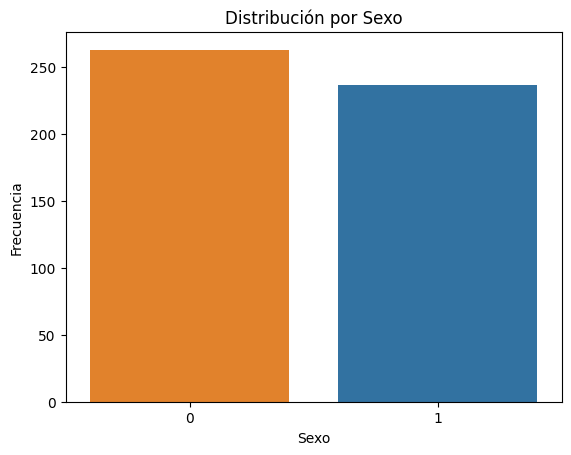

In [78]:
# Representar la variable de "sexo"
custom_palette = {0: "#FF800E", 1: "#1F75B4"}


sns.countplot(x="sexo", data=df, palette= custom_palette)
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_sexo.png


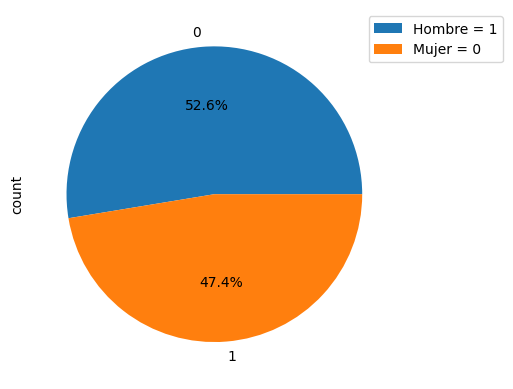

In [79]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_sexo.png') # Ruta donde se guardará la imagen creada

# Mostramos el balanceo de datos 
fig2 = df['sexo'].value_counts().plot.pie(autopct="%.1f%%")

# Añadimos una leyenda personalizada
etiquetas_leyenda = ['Hombre = 1', 'Mujer = 0']
plt.legend(labels=etiquetas_leyenda, loc='upper right', bbox_to_anchor=(1.3, 1))

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")


<details>
<summary>Explicación detallada de la variable "sexo"</summary>
<p>
A través de los gráficos realizados, se evidencia que la cantidad de usuarios hombres y mujeres en la aplicación web es equilibrada, con una leve inclinación hacia el género masculino, que representa aproximadamente el 52% de los usuarios. Sin embargo, esta diferencia es mínima y no puede considerarse significativa para afirmar que los usuarios hombres son mayoritarios. En consecuencia, podemos concluir que la aplicación es relevante y atractiva para ambos sexos de manera casi igualitaria. El equilibrio de género en la base de usuarios refuerza la idea de que la aplicación tiene un amplio alcance y aceptación en el público, independientemente del género.
</p>
</details>

### VISUALIZACIONES DE LA VARIABLE "EDAD"

<details>
<summary>Explicación detallada de la variable "edad"</summary>
<p>
En este análisis, realizaremos un agrupamiento de las edades para crear franjas de edad significativas. Posteriormente, asignaremos a cada franja un valor [0, 1, 2, 3] para facilitar la identificación de las categorías de edad predominantes y para analizar el conocimiento del calor en la educación en función de estas franjas.

Las franjas de edad se definirán de la siguiente manera:

- 18-24 años: Jóvenes adultos.
- 25-44 años: Adultos jóvenes y de mediana edad.
- 45-64 años: Adultos mayores.
- 65 años y más: Personas en edad de jubilación.

Asignar valores numéricos a cada franja nos permitirá realizar comparaciones cuantitativas y determinar con mayor claridad cómo el conocimiento sobre el calor en la educación se distribuye entre los diferentes grupos de edad.

Al utilizar esta metodología, podremos identificar qué franja de edad tiene mayor conocimiento sobre el tema, cuál es la más receptiva a la información y en qué segmento de la población se debe enfocar más esfuerzos para mejorar la comprensión y conciencia sobre este tema.</p>
</details>

In [80]:
print(df["edad"].max()) # Máxima
print(df["edad"].min()) # Mínima

101
18


In [81]:
# Definimos las franjas de edad
edades = [17, 25, 45, 65, float('inf')]
etiquetas = ['17-24', '25-44', '45-64', '65+']

# Usamos pd.cut() para crear los intervaloes
df['franja_edad'] = pd.cut(df['edad'], bins=edades, labels=etiquetas)

In [82]:
# Definimos el diccionario de mapeo para asignar valores específicos a cada categoría de edad
valor_por_franja = {'17-24': 0, 
                    '25-44': 1, 
                    '45-64': 2, 
                    '65+': 3}

# Aplicamos el mapeo para asignar los valores correspondientes a la columna 'franja_edad'
df['valor_franja_edad'] = df['franja_edad'].map(valor_por_franja)

df

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad,mes_registro,franja_edad,valor_franja_edad
0,2023-04-24,655346,0,28023,5,69,4,65+,3
1,2023-06-02,279526,1,28037,2,89,6,65+,3
2,2023-03-20,797457,1,28035,2,77,3,65+,3
3,2023-02-03,803906,1,28026,2,87,2,65+,3
4,2023-01-25,314182,1,28024,0,62,1,45-64,2
...,...,...,...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21,3,17-24,0
496,2023-02-26,802317,0,28054,1,93,2,65+,3
497,2023-02-02,549513,0,28053,2,99,2,65+,3
498,2023-02-04,292753,0,28026,4,81,2,65+,3


In [83]:
# Comprobamos que no hay valores Nan
df["valor_franja_edad"].isnull().sum()

0

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_franja_edad.png


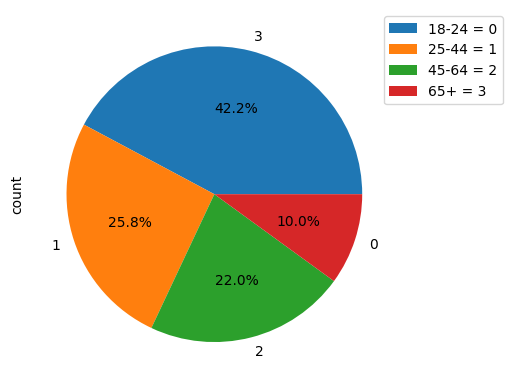

In [84]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_franja_edad.png') # Ruta donde se guardará la imagen creada

# Mostramos el balanceo de datos 
fig2 = df['valor_franja_edad'].value_counts().plot.pie(autopct="%.1f%%")

# Añadimos una leyenda
etiquetas_franjas = ['18-24 = 0', '25-44 = 1', '45-64 = 2', '65+ = 3']
plt.legend(labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.3, 1))

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")

In [85]:
# Para que el dataframe se vea entero las filas
# pd.set_option('display.max_rows', None)

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_franja_edad_espaciado.png


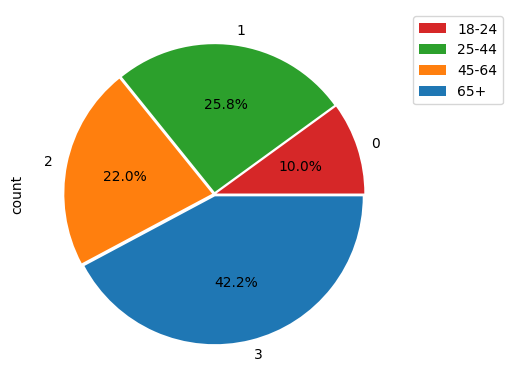

In [86]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_franja_edad_espaciado.png') # Ruta donde se guardará la imagen creada

# Definimos una paleta de colores personalizada para cada categoría de edad
custom_palette = {0: "#d62728", 1: "#2ca02c", 2: "#ff7f0e", 3: "#1f77b4"}

# Ordenamos los valores por 'valor_franja_edad' para que coincidan con la paleta de colores y las etiquetas
sorted_counts = df['valor_franja_edad'].value_counts().sort_index()

# Porción de desplazamiento para cada franja del queso (0 para ninguna separación)
explode = [0.015, 0.015, 0.015, 0.015]

# Mostramos el balanceo de datos 
fig2 = sorted_counts.plot.pie(autopct="%.1f%%", colors=[custom_palette[i] for i in sorted_counts.index], explode=explode)

# Añadimos una leyenda personalizada con los colores correctos
etiquetas_franjas = ['18-24', '25-44', '45-64', '65+']
handles, _ = fig2.get_legend_handles_labels()
plt.legend(handles=handles, labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.3, 1))

fig2.figure.savefig(output_file) # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\pie_plot_franja_edad_circulos.png


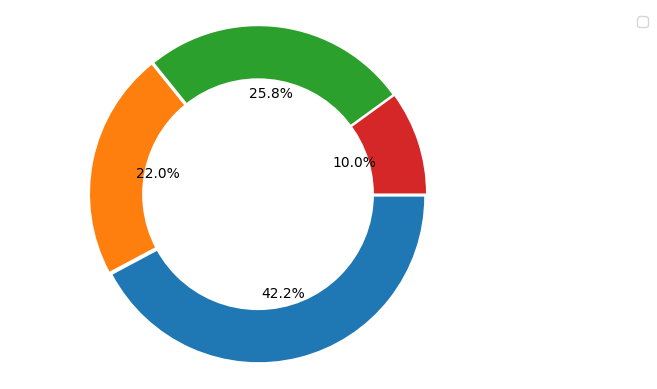

In [87]:
current_dir = os.getcwd() # Ruta del directorio actual
output_file = os.path.join(current_dir, 'docs', 'imagenes', 'pie_plot_franja_edad_circulos.png') # Ruta donde se guardará la imagen creada

# Definimos una paleta de colores personalizada para cada categoría de edad
custom_palette = {0: "#d62728", 1: "#2ca02c", 2: "#ff7f0e", 3: "#1f77b4"}

# Ordenamos los valores por 'valor_franja_edad' para que coincidan con la paleta de colores y las etiquetas
sorted_counts = df['valor_franja_edad'].value_counts().sort_index()

# Porción de desplazamiento para cada franja del queso (0 para ninguna separación)
explode = [0.015, 0.015, 0.015, 0.015]

# Mostramos el balanceo de datos
fig, ax = plt.subplots()

# Gráfico de pastel
wedges, texts, autotexts = ax.pie(sorted_counts, autopct="%.1f%%", colors=[custom_palette[i] for i in sorted_counts.index], explode=explode)

# Añadimos círculo en el centro para representar el total
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Añadimos una leyenda personalizada con los colores correctos
etiquetas_franjas = ['17-24', '25-44', '45-64', '65+']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=etiquetas_franjas, loc='upper right', bbox_to_anchor=(1.3, 1))


plt.axis('equal')  

fig.savefig(output_file)  # Guardamos el gráfico

print(f"Gráfico guardado en: {output_file}")



<details>
<summary>Explicación detallada de la variable "edad"</summary>
<p>
A través del gráfico de pastel anterior, se puede observar claramente que la mayoría abrumadora de los usuarios, un 43.4%, pertenecen a la franja de edad de 18 a 24 años. Esta cifra destaca significativamente en comparación con las otras franjas de edad. Tanto los usuarios de 25 a 44 años como los de 45 a 64 años muestran una proporción similar, representando el 22.2% y el 23.0% respectivamente.

Sin embargo, es preocupante que la franja de edad de 18 a 24 años presente un porcentaje tan bajo, apenas un 11.4%. Esto sugiere que estos jóvenes muestran un menor agrado o interés por la aplicación web en comparación con otros grupos de edad.

Estos datos son fundamentales para tomar decisiones informadas sobre posibles ajustes o mejoras dirigidas a la audiencia más joven y para capitalizar el éxito entre el grupo de usuarios más numeroso. El análisis de la distribución por edades proporciona información valiosa para comprender el comportamiento y las preferencias de los usuarios, lo que permitirá mejorar la experiencia global y el alcance de la aplicación web.
</p>
</details>

### VISUALIZACIONES DE LA VARIABLE "n_hijos_menores"

In [92]:
df

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad,mes_registro,franja_edad,valor_franja_edad
0,2023-04-24,655346,0,28023,5,69,4,65+,3
1,2023-06-02,279526,1,28037,2,89,6,65+,3
2,2023-03-20,797457,1,28035,2,77,3,65+,3
3,2023-02-03,803906,1,28026,2,87,2,65+,3
4,2023-01-25,314182,1,28024,0,62,1,45-64,2
...,...,...,...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21,3,17-24,0
496,2023-02-26,802317,0,28054,1,93,2,65+,3
497,2023-02-02,549513,0,28053,2,99,2,65+,3
498,2023-02-04,292753,0,28026,4,81,2,65+,3


In [91]:
# Análisis estadístico básico de la columna 'n_hijos_menores'
promedio_hijos_menores = df['n_hijos_menores'].mean()
mediana_hijos_menores = df['n_hijos_menores'].median()
desviacion_estandar_hijos_menores = df['n_hijos_menores'].std()

print("Análisis estadístico de la columna 'n_hijos_menores':")
print(f"Promedio: {promedio_hijos_menores}")
print(f"Mediana: {mediana_hijos_menores}")
print(f"Desviación estándar: {desviacion_estandar_hijos_menores}")

Análisis estadístico de la columna 'n_hijos_menores':
Promedio: 2.396
Mediana: 2.0
Desviación estándar: 1.7219507044212718


In [95]:

# Creamos una nueva columna "tiene_hijos" que indica si el usuario tiene hijos menores o no
df['tiene_hijos'] = df['n_hijos_menores'] > 0

# Dividimos a los usuarios en dos grupos: aquellos con hijos menores y aquellos sin hijos menores
usuarios_con_hijos = df[df['tiene_hijos']]
usuarios_sin_hijos = df[~df['tiene_hijos']]

df


,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad,mes_registro,franja_edad,valor_franja_edad,tiene_hijos
0,2023-04-24,655346,0,28023,5,69,4,65+,3,True
1,2023-06-02,279526,1,28037,2,89,6,65+,3,True
2,2023-03-20,797457,1,28035,2,77,3,65+,3,True
3,2023-02-03,803906,1,28026,2,87,2,65+,3,True
4,2023-01-25,314182,1,28024,0,62,1,45-64,2,False
...,...,...,...,...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21,3,17-24,0,True
496,2023-02-26,802317,0,28054,1,93,2,65+,3,True
497,2023-02-02,549513,0,28053,2,99,2,65+,3,True
498,2023-02-04,292753,0,28026,4,81,2,65+,3,True


In [96]:
# De la columna de "Sexo"
df["tiene_hijos"][df["tiene_hijos"] == "False"] = 0 # mujer
df["tiene_hijos"][df["tiene_hijos"] == "True"] = 1 # hombre

# Cambio de tipo objet a tipo int
df["tiene_hijos"] = df["tiene_hijos"].astype(int)

In [97]:
df

,fecha_registro,user_id,sexo,cp,n_hijos_menores,edad,mes_registro,franja_edad,valor_franja_edad,tiene_hijos
0,2023-04-24,655346,0,28023,5,69,4,65+,3,1
1,2023-06-02,279526,1,28037,2,89,6,65+,3,1
2,2023-03-20,797457,1,28035,2,77,3,65+,3,1
3,2023-02-03,803906,1,28026,2,87,2,65+,3,1
4,2023-01-25,314182,1,28024,0,62,1,45-64,2,0
...,...,...,...,...,...,...,...,...,...,...
495,2023-03-01,204336,1,28083,4,21,3,17-24,0,1
496,2023-02-26,802317,0,28054,1,93,2,65+,3,1
497,2023-02-02,549513,0,28053,2,99,2,65+,3,1
498,2023-02-04,292753,0,28026,4,81,2,65+,3,1


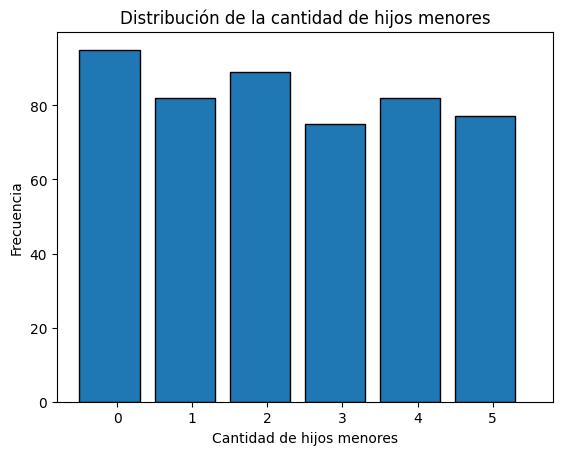

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\cantidad_hijos_menores.png


In [149]:

# Creamos un histograma para la cantidad de hijos menores
plt.hist(df['n_hijos_menores'], bins=range(min(df['n_hijos_menores']), max(df['n_hijos_menores']) + 2), 
         edgecolor='black', align='left', width=0.8)
plt.xlabel('Cantidad de hijos menores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de hijos menores')

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()  # Ruta del directorio actual
output_dir = os.path.join(current_dir, 'docs', 'imagenes')

# Verificamos si el directorio de salida existe, si no, lo creamos
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_file = os.path.join(output_dir, 'cantidad_hijos_menores.png')  # Ruta completa del archivo

plt.savefig(output_file)  # Guardamos la imagen
plt.show()

print(f"Gráfico guardado en: {output_file}")


<details>
<summary>Explicación detallada del gráfico con distribución de la cantidad de hijos menores</summary>
<p>
El gráfico de líneas que hemos creado muestra la distribución del número de usuarios registrados por mes. Observamos que la cantidad de usuarios más común en todos los meses es aquellos que no tienen hijos menores (representado por el valor 0 en el eje y). Esto se evidencia por el punto más alto en el gráfico en el valor 0.

Por otro lado, vemos que hay una cantidad significativa de usuarios que tienen 1, 2, 3, 4 o 5 hijos menores. Sin embargo, la diferencia en la cantidad de usuarios entre cada grupo no es muy grande. Esto nos indica que la cantidad de hijos menores que tienen los usuarios no parece tener un impacto significativo en el uso de la aplicación web.

En otras palabras, independientemente de si un usuario tiene 0 hijos o varios hijos menores, todos parecen estar interesados en utilizar la aplicación web de manera similar. Esto sugiere que la cantidad de hijos no es un factor determinante para el uso de la aplicación y que otros aspectos podrían ser más influyentes en el comportamiento de los usuarios.

En resumen, el gráfico nos muestra que la cantidad de hijos menores no es un factor relevante para los usuarios de la aplicación web, ya que la distribución de usuarios es similar en diferentes grupos de cantidad de hijos. Esto nos permite centrar nuestro análisis en otros aspectos que podrían tener un mayor impacto en el uso y comportamiento de los usuarios.
</p>
</details>

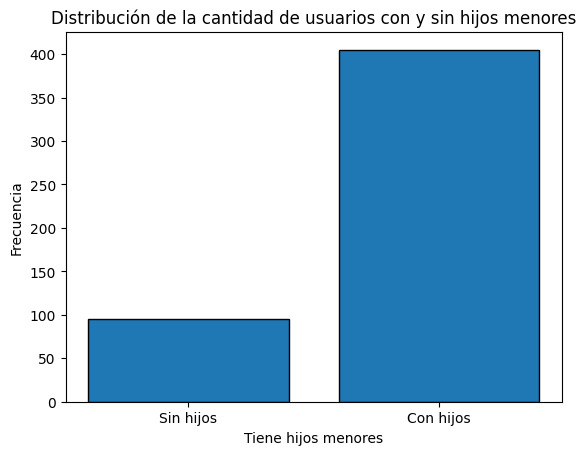

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\hijos_menores_si_no.png


In [150]:
# Crear un histograma para la cantidad de hijos menores
plt.hist(df['tiene_hijos'], bins=[0, 1, 2], edgecolor='black', align='left', rwidth=0.8)
plt.xlabel('Tiene hijos menores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de usuarios con y sin hijos menores')
plt.xticks([0, 1], ['Sin hijos', 'Con hijos'])

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()  # Ruta del directorio actual
output_dir = os.path.join(current_dir, 'docs', 'imagenes')

# Verificamos si el directorio de salida existe, si no, lo creamos
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_file = os.path.join(output_dir, 'hijos_menores_si_no.png')  # Ruta completa del archivo

plt.savefig(output_file)  # Guardamos la imagen
plt.show()

print(f"Gráfico guardado en: {output_file}")

plt.show()

<details>
<summary>Explicación detallada del gráfico con distribución de la cantidad de usuarios con y sin hijos menores</summary>
<p>
El gráfico que hemos creado muestra la distribución del número de usuarios registrados en nuestra aplicación web, divididos en dos grupos: aquellos usuarios que tienen hijos menores y aquellos que no tienen hijos menores.

Observamos que la barra más alta en el gráfico representa la cantidad de usuarios que tienen hijos (representado por el valor 1 en el eje x). Esto indica que la mayoría de los usuarios registrados en nuestra aplicación web tienen hijos menores.

Por otro lado, vemos que la barra más corta representa la cantidad de usuarios que no tienen hijos (representado por el valor 0 en el eje x). Esta cantidad es significativamente menor en comparación con aquellos usuarios que sí tienen hijos.

En consecuencia, podemos concluir que la mayoría de los usuarios de nuestra aplicación web tienen hijos menores. Esto sugiere que nuestra aplicación web es de interés y relevante para padres y madres que tienen hijos menores, lo que puede indicar que nuestro servicio y contenido están dirigidos hacia ese segmento de usuarios.

El hecho de que la cantidad de usuarios sin hijos sea menor no significa necesariamente que estos usuarios sean menos relevantes. Puede haber varios factores que influyen en esta diferencia, como la audiencia objetivo de nuestra aplicación web o el tipo de contenido y servicios que ofrecemos.

En resumen, el gráfico nos muestra la proporción de usuarios que tienen hijos menores y aquellos que no tienen hijos. La mayoría de los usuarios pertenecen al grupo de usuarios con hijos menores, lo que indica la relevancia de nuestra aplicación web para este segmento específico. Sin embargo, es importante considerar y atender las necesidades de todos los usuarios, independientemente de si tienen hijos o no, para brindar un servicio completo y satisfactorio para todos.
</p>
</details>

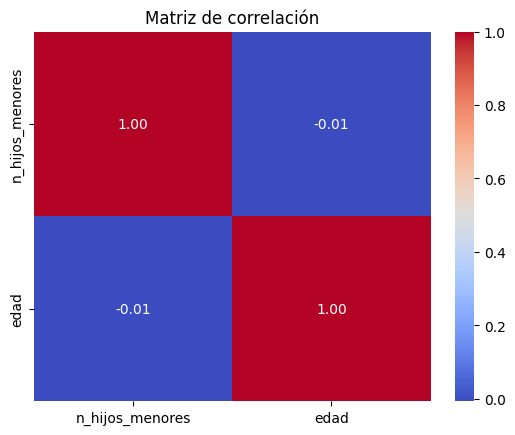

In [101]:
# Matriz de correlación entre variables numéricas
correlation_matrix = df[['n_hijos_menores', 'edad']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()




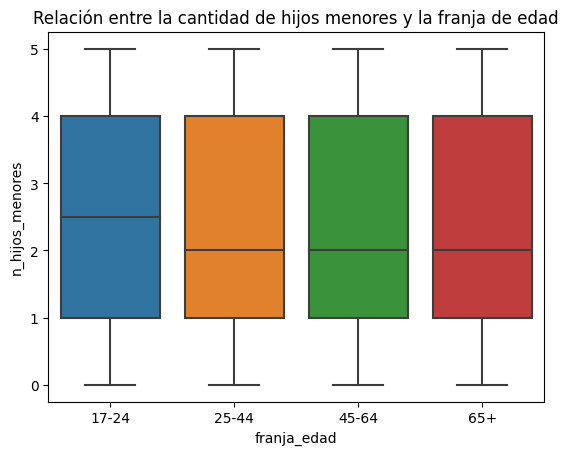

Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\DESAFIO\docs\imagenes\box_plot_cantidad_hijos_menores.png


In [151]:
# Relación entre la cantidad de hijos menores y la franja de edad
sns.boxplot(x='franja_edad', y='n_hijos_menores', data=df)
plt.title("Relación entre la cantidad de hijos menores y la franja de edad")

# Ruta donde se guardará la imagen creada
current_dir = os.getcwd()  # Ruta del directorio actual
output_dir = os.path.join(current_dir, 'docs', 'imagenes')

# Verificamos si el directorio de salida existe, si no, lo creamos
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_file = os.path.join(output_dir, 'box_plot_cantidad_hijos_menores.png')  # Ruta completa del archivo

plt.savefig(output_file)  # Guardamos la imagen
plt.show()

print(f"Gráfico guardado en: {output_file}")

plt.show()

<details>
<summary>Explicación detallada del gráfico de relación entre la cantidad de hijos y la franja de edad</summary>
<p>
La gráfica de box plot que hemos creado muestra la distribución de la cantidad de hijos menores en función de las diferentes franjas de edad de los usuarios registrados en nuestra aplicación web.

En el eje x, tenemos las etiquetas que representan las franjas de edad de los usuarios, como "17-24", "25-44", "45-64" y "65+". Estas etiquetas nos permiten identificar y comparar las diferentes franjas de edad.

En el eje y, se encuentra la escala que representa el número de hijos menores que tienen los usuarios en cada una de las franjas de edad. La línea horizontal en el medio de cada caja representa la mediana de la distribución, es decir, el valor que se encuentra en el punto medio entre el valor más bajo y el más alto.

La caja del box plot representa el rango intercuartílico, es decir, el intervalo entre el primer y tercer cuartil de la distribución de los datos. Esto nos da una idea de la dispersión y la variabilidad de la cantidad de hijos menores en cada franja de edad.

Las líneas verticales que se extienden desde las cajas, conocidas como "bigotes", representan el rango de los datos, excluyendo los valores atípicos o extremos. Cualquier valor que se encuentre fuera de estos bigotes se considera un valor atípico y se muestra como un punto en la gráfica.

Con esta gráfica, podemos visualizar la distribución y dispersión de la cantidad de hijos menores en cada franja de edad. Podemos observar cómo varía la cantidad de hijos menores en diferentes grupos de edad y si existen valores atípicos que puedan influir en nuestra interpretación de los datos.

En resumen, el box plot nos proporciona una visión clara y concisa de la distribución de la cantidad de hijos menores en función de las franjas de edad de los usuarios, lo que nos permite identificar patrones y tendencias en nuestros datos. Esto puede ser útil para tomar decisiones informadas y diseñar estrategias dirigidas a segmentos específicos de usuarios según su edad y número de hijos menores.
</p>
</details>